# ITCR - Ciencias de Datos

## Aprendizaje Automático 

## Detección de anomalías usando Isolation Forest y Kernel Density Estimation

Profesora: María Auxiliadora Mora 
      

### Introducción
La detección de anomalías consiste en encontrar puntos de **datos que se desvían de la norma**. En otras palabras, esos son los puntos que no siguen los patrones esperados. Los **valores atípicos y las excepciones** son términos utilizados para describir datos inusuales.

Un método de procesar y detectar las anomalías es el de Bosques de aislamiento que se explica a continuación.

### Bosques de aislamiento (Isolation Forest)

Los bosques de aislamiento se construyen utilizando árboles de decisión. El algoritmo es no supervisado por lo que no requiere datos etiquetados. Los bosques de aislamiento se diseñaron teniendo en cuenta que las anomalías son pocas y los puntos de datos son muy distintos de los otros miembros del conjunto.

Los árboles de decisión se construyen utilizando criterios de información como el índice de Gini o la entropía. Los grupos diferentes se separan muy rápidamente en la raíz del árbol ya que a este le resulta más sencillo distinguirlas de los otros datos y, más profundamente en las ramas, se identifican las distinciones más sutiles.

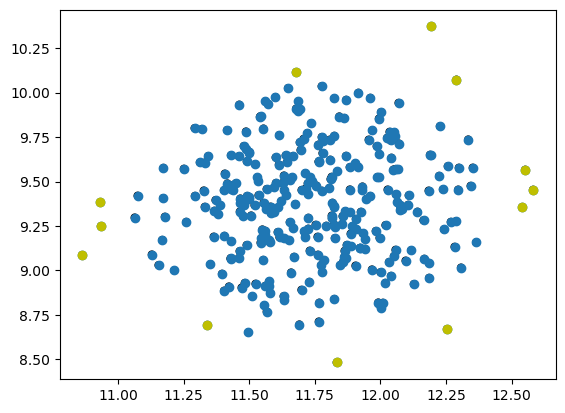

In [15]:
# Example using Scikit-learn

from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
 
random.seed(3)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(20, 5))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=_, s=25, edgecolor="k")


# contamination: the proportion of outliers that need to be removed. 
clf = IsolationForest(n_estimators=100, contamination=.04)

predictions = clf.fit_predict(X)
 
outlier_index = where(predictions==-1)
values = X[outlier_index]
plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()


In [16]:
# display index
print("===============================================")
print("Índices de las anomalías:", outlier_index)
print("===============================================")
# remove anomalies
print("Cantidad de datos incluyendo anomalías:", len(X))
print("Datos sin anomalías:", len(X[where(predictions>-1)]))

Índices de las anomalías: (array([ 22,  82, 110, 134, 138, 147, 151, 182, 199, 228, 262, 288]),)
Cantidad de datos incluyendo anomalías: 300
Datos sin anomalías: 288


In [17]:
print(type(X))

<class 'numpy.ndarray'>


## Referencias

- Bishop, C. (2006). Pattern recognition and machine learning. springer. Recuperado de https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf

- Khan, M. (2022). Anomaly Detection with Isolation Forest and Kernel Density Estimation. Recuperado de https://machinelearningmastery.com/anomaly-detection-with-isolation-forest-and-kernel-density-estimation/